<a href="https://www.kaggle.com/code/yashashree24/kerela-election?scriptVersionId=115658790" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored
print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


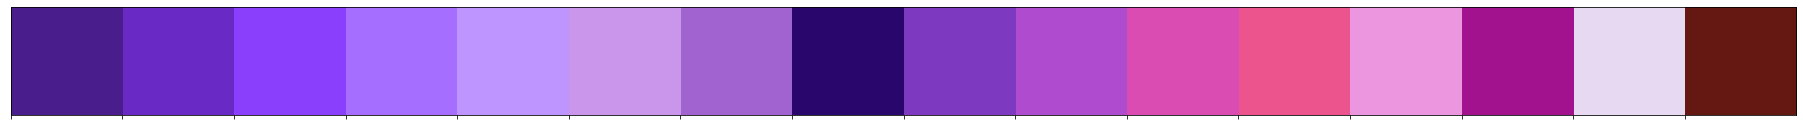

In [2]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

In [3]:
votes = pd.read_csv("/kaggle/input/kerala-election-2021-data/Kerala_election_2021.csv")
df = votes.copy()
df.head(n = 10).style.background_gradient(cmap = "Purples_r")

,CONSTITUENCY,DISTRICT,LDF,UDF,NDA,NOTA,OTHERS,EVM VOTES,POSTAL VOTES,TOTAL VOTES,LEAD,WINNER,%LDF,%UDF,%NDA,%NOTA,%POSTAL,%LEAD
0,Alappuzha,Alappuzha,73412,61768,21650,1089,527,154149,4297,158446,11644,LDF,46.332504,38.983628,13.663961,0.687300,2.711965,7.348876
1,Ambalapuzha,Alappuzha,61365,50240,22389,591,2436,133382,3639,137021,11125,LDF,44.785106,36.665913,16.339831,0.431321,2.655797,8.119193
2,Aroor,Alappuzha,75617,68604,17479,846,1945,160851,3640,164491,7013,LDF,45.970296,41.706841,10.626113,0.514314,2.212887,4.263455
3,Chengannur,Alappuzha,71502,39409,34620,491,1149,142958,4213,147171,32093,LDF,48.584300,26.777694,23.523656,0.333626,2.862656,21.806606
4,Cherthala,Alappuzha,83702,77554,14562,602,1677,172214,5883,178097,6148,LDF,46.997984,43.545933,8.176443,0.338018,3.303256,3.452051
5,Haripad,Alappuzha,59102,72768,17890,536,327,145585,5038,150623,13666,UDF,39.238363,48.311347,11.877336,0.355855,3.344775,9.072984
6,Kayamkulam,Alappuzha,77348,71050,11413,420,1026,156701,4556,161257,6298,LDF,47.965670,44.060103,7.077522,0.260454,2.825304,3.905567
7,Kuttanadu,Alappuzha,57379,51863,14946,523,925,121355,4281,125636,5516,LDF,45.670827,41.280366,11.896272,0.416282,3.407463,4.390461
8,Mavelikkara,Alappuzha,71743,47026,30955,519,447,146030,4660,150690,24717,LDF,47.609662,31.207114,20.542173,0.344416,3.092441,16.402548
9,Aluva,Ernakulam,54817,73703,15893,939,5076,148130,2298,150428,18886,UDF,36.440689,48.995533,10.565187,0.624219,1.527641,12.554844


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CONSTITUENCY  140 non-null    object 
 1   DISTRICT      140 non-null    object 
 2   LDF           140 non-null    int64  
 3   UDF           140 non-null    int64  
 4   NDA           140 non-null    int64  
 5   NOTA          140 non-null    int64  
 6   OTHERS        140 non-null    int64  
 7   EVM VOTES     140 non-null    int64  
 8   POSTAL VOTES  140 non-null    int64  
 9   TOTAL VOTES   140 non-null    int64  
 10  LEAD          140 non-null    int64  
 11  WINNER        140 non-null    object 
 12  %LDF          140 non-null    float64
 13  %UDF          140 non-null    float64
 14  %NDA          140 non-null    float64
 15  %NOTA         140 non-null    float64
 16  %POSTAL       140 non-null    float64
 17  %LEAD         140 non-null    float64
dtypes: float64(6), int64(9), objec

In [5]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
LDF,140.000000,67388.664286,12388.317748,28323.000000,59253.000000,67264.000000,75553.250000,96129.000000
UDF,140.000000,58645.350000,14011.321568,32995.000000,46918.500000,58131.000000,68882.750000,94225.000000
NDA,140.000000,18579.064286,11642.496007,0.000000,10576.750000,15040.500000,23996.250000,65013.000000
NOTA,140.000000,697.821429,269.006814,269.000000,502.250000,669.500000,828.500000,2313.000000
OTHERS,140.000000,3501.964286,6160.737949,327.000000,1026.750000,1925.500000,3406.500000,45154.000000
EVM VOTES,140.000000,145159.657143,14289.645060,108434.000000,134155.750000,145299.000000,154806.250000,188541.000000
POSTAL VOTES,140.000000,3653.207143,1080.589364,1269.000000,2906.000000,3639.500000,4342.000000,6496.000000
TOTAL VOTES,140.000000,148812.864286,14763.613905,110098.000000,137686.250000,149833.500000,158720.500000,193822.000000
LEAD,140.000000,16037.057143,12015.401755,38.000000,6157.750000,14048.000000,23928.500000,60963.000000
%LDF,140.000000,45.246872,6.886904,19.600692,41.858719,45.832561,48.267848,62.486245


In [6]:
df.nunique()

CONSTITUENCY    140
DISTRICT         14
LDF             140
UDF             140
NDA             139
NOTA            132
OTHERS          137
EVM VOTES       140
POSTAL VOTES    139
TOTAL VOTES     140
LEAD            140
WINNER            2
%LDF            140
%UDF            140
%NDA            139
%NOTA           140
%POSTAL         140
%LEAD           140
dtype: int64

In [7]:
df.shape

(140, 18)

In [8]:
print(df.groupby('DISTRICT').size())

DISTRICT
Alappuzha              9
Ernakulam             14
Idukki                 5
Kannur                11
Kasargode              5
Kollam                11
Kottayam               9
Kozhikode             13
Malappuram            16
Palakkad              12
Pathanamthitta         5
Thiruvananthapuram    14
Thrissur              13
Wayanad                3
dtype: int64


In [9]:
df['DISTRICT'].unique()

array(['Alappuzha', 'Ernakulam', 'Idukki', 'Kannur', 'Kasargode',
       'Kollam', 'Kottayam', 'Kozhikode', 'Malappuram', 'Palakkad',
       'Pathanamthitta', 'Thiruvananthapuram', 'Thrissur', 'Wayanad'],
      dtype=object)

In [10]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))

Totally there are 0 null values in the dataset


In [11]:
df.groupby(['DISTRICT'])['TOTAL VOTES'].sum().sort_values().to_frame()

,TOTAL VOTES
DISTRICT,
Wayanad,472222
Idukki,638442
Pathanamthitta,734320
Kasargode,809510
Kottayam,1178302
Alappuzha,1373432
Kollam,1608760
Kannur,1651361
Palakkad,1784764


In [12]:
df['WINNER'].value_counts()

LDF    99
UDF    41
Name: WINNER, dtype: int64

In [13]:
lead = df.groupby('DISTRICT').LEAD.agg([min, max])
print(lead)

                     min    max
DISTRICT                       
Alappuzha           5516  32093
Ernakulam            992  25364
Idukki              1835  38305
Kannur              1745  60963
Kasargode            745  27139
Kollam              1096  37057
Kottayam            4256  29122
Kozhikode            333  38502
Malappuram            38  35208
Palakkad            3016  36674
Pathanamthitta      1285  19003
Thiruvananthapuram  3949  31636
Thrissur             946  39400
Wayanad             5470  11822


In [14]:
seats = df.groupby('DISTRICT')['WINNER'].value_counts()
print(seats)

DISTRICT            WINNER
Alappuzha           LDF        8
                    UDF        1
Ernakulam           UDF        9
                    LDF        5
Idukki              LDF        4
                    UDF        1
Kannur              LDF        9
                    UDF        2
Kasargode           LDF        3
                    UDF        2
Kollam              LDF        9
                    UDF        2
Kottayam            LDF        5
                    UDF        4
Kozhikode           LDF       11
                    UDF        2
Malappuram          UDF       12
                    LDF        4
Palakkad            LDF       10
                    UDF        2
Pathanamthitta      LDF        5
Thiruvananthapuram  LDF       13
                    UDF        1
Thrissur            LDF       12
                    UDF        1
Wayanad             UDF        2
                    LDF        1
Name: WINNER, dtype: int64


[Text(0.5, 1.0, 'Distribution of LDF')]

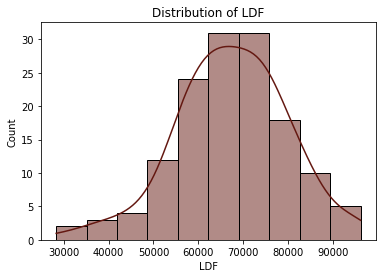

In [15]:
sns.histplot(x = df["LDF"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of LDF")

[Text(0.5, 1.0, 'Distribution of UDF')]

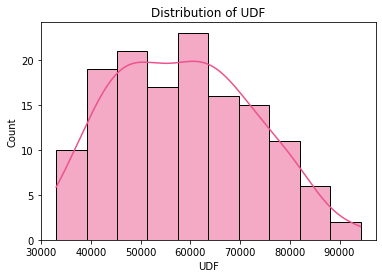

In [16]:
sns.histplot(x = df["UDF"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of UDF")

[Text(0.5, 1.0, 'Distribution of NDA')]

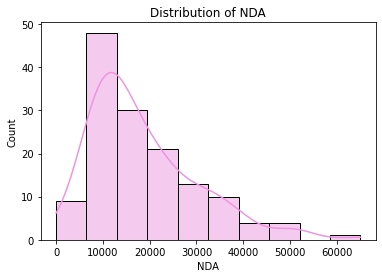

In [17]:
sns.histplot(x = df["NDA"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of NDA")

[Text(0.5, 1.0, 'Distribution of NOTA')]

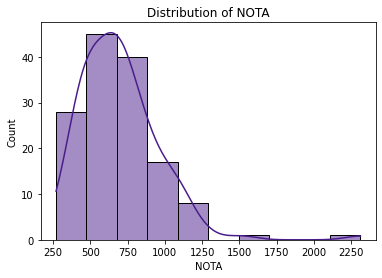

In [18]:
sns.histplot(x = df["NOTA"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#491D8B").set(title = "Distribution of NOTA")

[Text(0.5, 1.0, 'Distribution of OTHERS')]

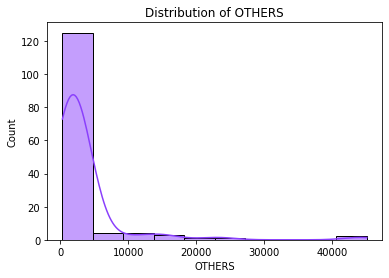

In [19]:
sns.histplot(x = df["OTHERS"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#8A3FFC").set(title = "Distribution of OTHERS")

In [20]:
fig = px.scatter(df, x="LDF", y="TOTAL VOTES",color='DISTRICT',title="Relation ship between LDF & TOTAL VOTES")
fig.show()

In [21]:
fig = px.scatter(df, x="UDF", y="TOTAL VOTES",color='DISTRICT',title="Relation ship between UDF & TOTAL VOTES")
fig.show()

In [22]:
fig = px.scatter(df, x="NDA", y="TOTAL VOTES",color='DISTRICT',title="Relation ship between NDA & TOTAL VOTES")
fig.show()

In [23]:
fig = px.scatter(df, x="NOTA", y="TOTAL VOTES",color='DISTRICT',title="Relation ship between NOTA & TOTAL VOTES")
fig.show()

In [24]:
fig = px.scatter(df, x="OTHERS", y="TOTAL VOTES",color='DISTRICT',title="Relation ship between OTHERS & TOTAL VOTES")
fig.show()

In [25]:
fig = px.density_heatmap(df, x = "DISTRICT", y = "WINNER",
                         color_continuous_scale = "magma", text_auto = True)
fig.show()

<AxesSubplot:xlabel='NOTA', ylabel='TOTAL VOTES'>

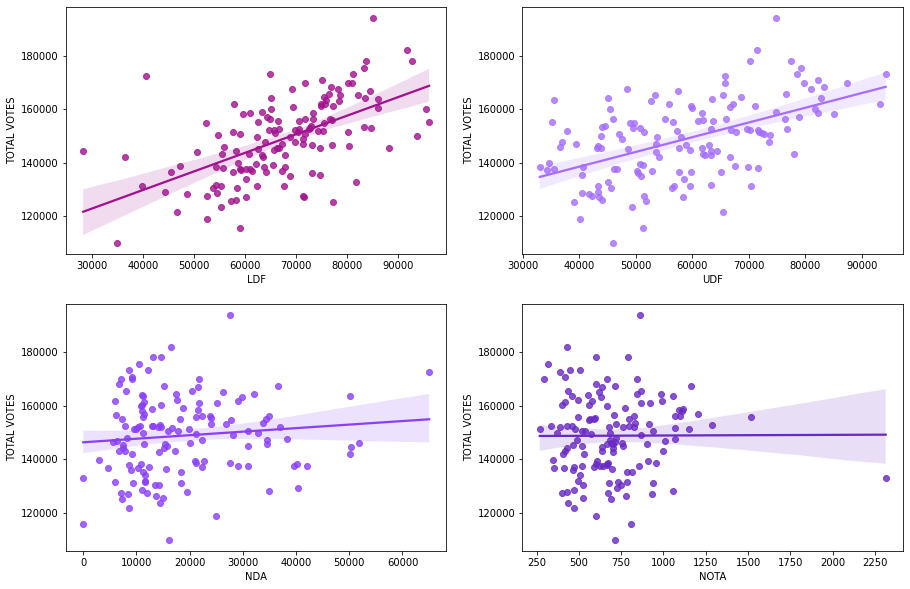

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "LDF", y = "TOTAL VOTES", data = df, color = "#A2128E")
sns.regplot(ax = axes[1], x = "UDF", y = "TOTAL VOTES", data = df, color = "#A56EFF")
sns.regplot(ax = axes[2], x = "NDA", y = "TOTAL VOTES", data = df, color = "#8A3FFC")
sns.regplot(ax = axes[3], x = "NOTA", y = "TOTAL VOTES", data = df, color = "#6929C4")

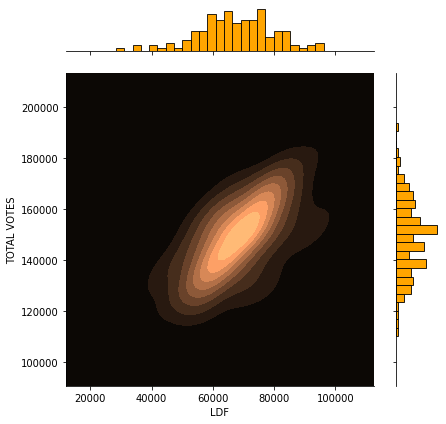

In [27]:
g = sns.JointGrid(data = df, x = "LDF", y = "TOTAL VOTES", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "copper")
g.plot_marginals(sns.histplot, color = "#FFA500", alpha = 1, bins = 25)

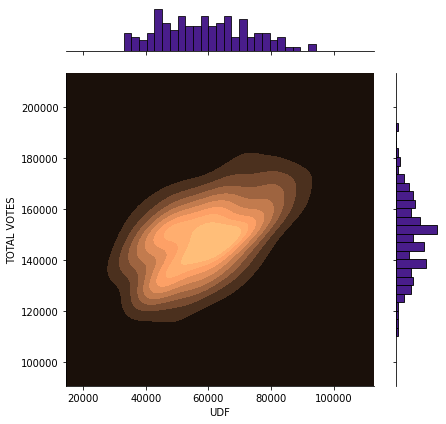

In [28]:
g = sns.JointGrid(data = df, x = "UDF", y = "TOTAL VOTES", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "copper")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25)

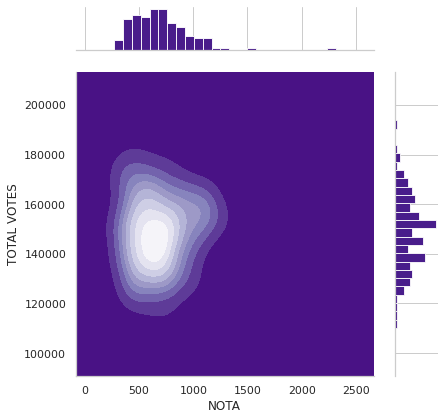

In [29]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df,x = "NOTA", y = "TOTAL VOTES", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Purples_r")
g.plot_marginals(sns.histplot, color = "#491D8B", alpha = 1, bins = 25)

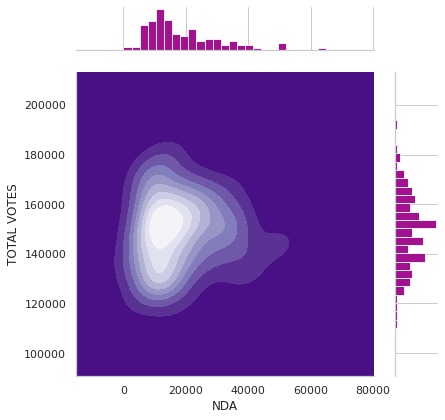

In [30]:
sns.set_theme(style = "whitegrid")
g = sns.JointGrid(data = df,x = "NDA", y = "TOTAL VOTES", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Purples_r")
g.plot_marginals(sns.histplot, color = "#A2128E", alpha = 1, bins = 25)

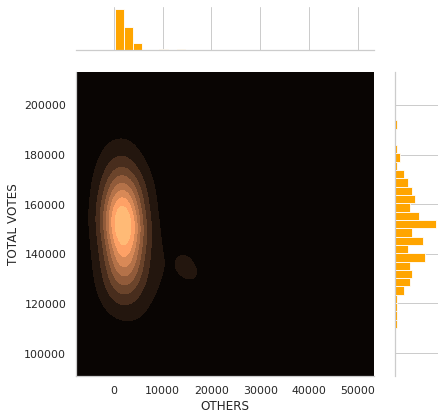

In [31]:
g = sns.JointGrid(data = df, x = "OTHERS", y = "TOTAL VOTES", space = 0.5)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "copper")
g.plot_marginals(sns.histplot, color = "#FFA500", alpha = 1, bins = 25)

In [32]:
subject = df["LDF"]
score = df["TOTAL VOTES"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

In [33]:
data = df
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [34]:
data = df[["LDF", "UDF", "NDA", "NOTA", "OTHERS"]]

fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

<AxesSubplot:xlabel='count', ylabel='WINNER'>

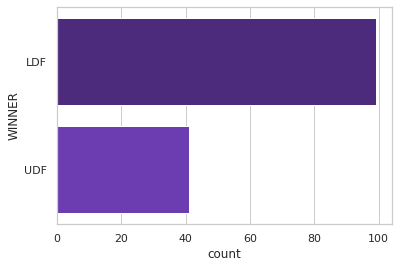

In [35]:
sns.countplot(y='WINNER', data=df, palette=purple)

<AxesSubplot:xlabel='count', ylabel='DISTRICT'>

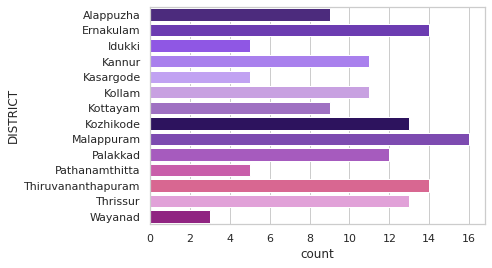

In [36]:
sns.countplot(y="DISTRICT", data=df, palette=purple)

In [37]:
print("Pearson correlation coefficient:", st.pearsonr(df["LDF"],
                                                      df["TOTAL VOTES"]))

Pearson correlation coefficient: (0.5807242883730385, 5.431217038091305e-14)


In [38]:
print("Pearson correlation coefficient:", st.pearsonr(df["UDF"],
                                                      df["TOTAL VOTES"]))

Pearson correlation coefficient: (0.5205144845526744, 4.341635365685993e-11)


In [39]:
print("Pearson correlation coefficient:", st.pearsonr(df["NDA"],
                                                      df["TOTAL VOTES"]))

Pearson correlation coefficient: (0.1039259224587629, 0.22172448914881615)


In [40]:
print("Pearson correlation coefficient:", st.pearsonr(df["NOTA"],
                                                      df["TOTAL VOTES"]))

Pearson correlation coefficient: (0.004313894723200911, 0.9596559749793856)


In [41]:
print("Pearson correlation coefficient:", st.pearsonr(df["OTHERS"],
                                                      df["TOTAL VOTES"]))

Pearson correlation coefficient: (-0.15173450634082736, 0.07351376476213825)
